In [1]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [2]:
df = pd.read_csv("C:\Adv seminar\graduation thesis\data\depress twitter Japanese\depress_twitter_Japanese.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [3]:
def data_preprocessing (text):
    if isinstance(text, float):
        text=''

    text = text.lower()
    text = re.sub(r"http\s+|www\S+http\S+", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [4]:
df.text = df["tweet"].apply(data_preprocessing)
df.head()

C:\Users\xingr\AppData\Local\Temp\ipykernel_26556\1806502255.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["tweet"].apply(data_preprocessing)


,tweet,label
0,調べてみたら、私のBEはまだ発送したばっかだったみたい😂\nどんまい！\nでももうちょっとで...,0
1,弁当買ったらしょう油付いてたんやけど、どれにかけるやつなん？( ˙꒳​˙ ) https:...,1
2,★体の悩み★相互フォロー支援\n体のあらゆる悩みについての情報配信・受信を支援するアカウント...,0
3,【#ユナイト神尾晋一郎】\n\n2月13日（土）26時放送📻\n『U-nite 81Satu...,0
4,【完売商品情報】\n\n『WE ARE 7ORDER IN PARCO』\n・ポーチ Mサイ...,0


c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='count'>

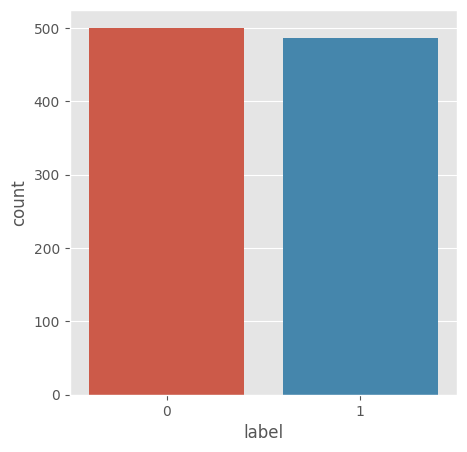

In [5]:

df.text = df["tweet"].apply(data_preprocessing)
df = df.drop_duplicates('tweet')
df['label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'label', data=df)

In [6]:
vect = TfidfVectorizer(ngram_range = (1,2)).fit(df['tweet'])
feature_names = vect.get_feature_names_out()
print('Number of features :{}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features :10141

First 20 features: 
['00' '00 10' '00 11時' '00 12' '00 24時' '00 おうちグッズや' '00 ニジフリ紫'
 '000オーバーが熱かった' '000オーバーが熱かった 本当にうれしい' '000円' '000円 楽天市場' '000円 限定15名'
 '000円です' '000円です よろしくお願いします' '000円取るのであれば'
 '000円取るのであれば ハイグレードシート搭載車もしくは1人掛けシート搭載車を投入しないかぎり' '000円程度かかるとのこと'
 '000円程度かかるとのこと 検討したいと持ち帰るが' '0061' '0061 tokyo']


In [7]:
X = df['tweet']
Y = df['label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (789, 10141)
size of y_train (789,)
size of x_test (198, 10141)
size of y_test (198,)


In [8]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
svc_acc = accuracy_score(svc_predict,y_test)
print('Test accuarcy : {:.2f}%'.format(svc_acc*100))
print(round(f1_score(y_test, svc_predict,pos_label=1.0),2))

Test accuarcy : 47.47%
0.5


c:\python\python install\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


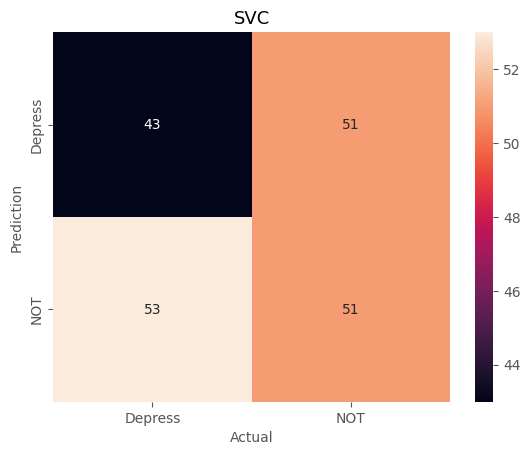

In [9]:
cm = confusion_matrix(y_test,svc_predict
                      )
sns.heatmap(cm,
            annot= True,
            fmt='g',
            xticklabels=['Depress','NOT'],
            yticklabels=['Depress','NOT'])
plt.ylabel('Prediction', fontsize = 10)
plt.xlabel('Actual',fontsize = 10)
plt.title("SVC", fontsize = 13)
plt.show()
